In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Xử lý dữ liệu đầu vào

In [34]:
# import dữ liệu
data = pd.read_csv("cars.csv")
data.describe()

,Price,miles(000),age,miles,year
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,11670.890909,65.276200,6.636364,65276.200000,2010.363636
std,5145.776725,54.448334,5.488586,54448.334008,5.488586
min,1000.000000,2.500000,1.000000,2500.000000,1989.000000
25%,8150.000000,21.700000,3.000000,21700.000000,2008.000000
50%,12500.000000,39.800000,4.000000,39800.000000,2013.000000
75%,15350.000000,106.070500,9.000000,106070.500000,2014.000000
max,21995.000000,200.000000,28.000000,200000.000000,2016.000000


In [35]:
data.isnull().sum()

Price         0
miles(000)    0
age           0
miles         0
year          0
model         0
dtype: int64

In [36]:
# xóa cột miles(000)
data = data.drop(columns=['miles(000)'])
data.tail()

,Price,age,miles,year,model
50,4950,12,145000,2005,DX
51,4200,13,132473,2004,DX
52,2500,18,200000,1999,DX
53,2500,14,122000,2003,DX
54,1000,20,196850,1997,DX


In [37]:
# lưu lại category của cột model
model_categories = data['model'].astype('category').cat.categories
print(model_categories)
# đổi dữ liệu cột model thành dạng số
data['model'] = data['model'].astype('category').cat.codes
data.head()

Index(['DX', 'EX-T', 'Ex-L', 'SE'], dtype='object')


,Price,age,miles,year,model
0,15500,4,24000,2013,2
1,14000,3,4800,2014,2
2,13999,4,77254,2013,2
3,10900,9,40000,2008,2
4,10500,5,75853,2012,1


# Tính hệ số tương quan + heatmap

In [38]:
data.corr()

,Price,age,miles,year,model
Price,1.000000,-0.857075,-0.890479,0.857075,0.571045
age,-0.857075,1.000000,0.779441,-1.000000,-0.603611
miles,-0.890479,0.779441,1.000000,-0.779441,-0.592755
year,0.857075,-1.000000,-0.779441,1.000000,0.603611
model,0.571045,-0.603611,-0.592755,0.603611,1.000000


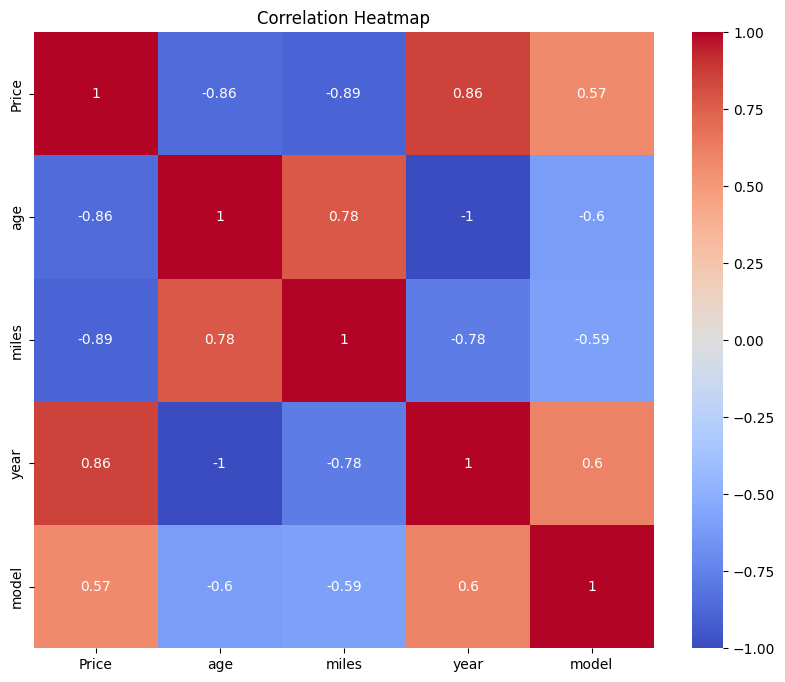

In [39]:
# ve heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Xây dựng mô hình HỒI QUY TUYẾN TÍNH

In [40]:
# khai báo mô hình
model = LinearRegression()

# khai báo Biến độc lập + phụ thuộc
y = data['Price']
X = data.drop(columns=['Price'])

In [41]:
# chia tập train : test (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)

In [42]:
# huan luyen mo hinh
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
# dự đoán
y_pred = model.predict(X_test)

# Tính chỉ số MSE + R^2 (đánh giá mô hình)

In [44]:
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = model.score(X_test, y_test)
r2_sklearn = r2_score(y_true=y_test, y_pred=y_pred)
print(f'Mean Squared Error: {mse:4f}')
print(f'R^2 (from model.score): {r2:4f}')
print(f'R^2 (from r2_score): {r2_sklearn}')

Mean Squared Error: 3797460.318658
R^2 (from model.score): 0.827007
R^2 (from r2_score): 0.8270071585181045
